# Demo 1: Fractals (Part 3)

In [5]:
import torch

print("PyTorch Version :\t", torch.__version__)
print("CUDA Available? :\t", torch.cuda.is_available())

PyTorch Version :	 2.0.1+cu118
CUDA Available? :	 True


## Heighway Dragon

The dragon curve is a family of self-similar fractal curves<sup>1</sup>. The 
Heighway dragon is a particular dragon curve formed initially from a single line 
segment by repeatedly replacing each segment by two segments with a right angle
and with a rotation of 45 $^\circ$ alternately to the right and to the 
left<sup>1</sup>. Unfortunately, it is difficult to visually represent this
construction method in a computationally efficient manner.

An alternative construction method uses an iterated function system (IFS). 
The Heighway dragon is also the limit set of the following IFS in the complex 
plane<sup>1</sup>:

$\quad f_1(z) = \frac{(1+i)z}{2}$

$\quad f_2(z) = 1 - \frac{(1-i)z}{2}$

with the initial set of points $S_0 = \{0, 1\}$.

An IFS is a method of constructing fractals as a set of points which is
iteratively grown according to a set of rules. A common example is the 
construction of the Sierpinsky triangle by the
[chaos game](https://en.wikipedia.org/wiki/Chaos_game), with the rules for this
example being well known.

The following code represents the IFS whose limit set is the Heighway Dragon.
As the number of iterations approaches infinity, the set of points converges to
the entire area of the Heighway Dragon fractal. Starting from the initial set,
the code iteratively applies both $f_1$ and $f_2$ to every point in the set,
effectively tripling the size of the set with each iteration.

While the IFS and points could be represented by Cartesian coordinates rather
than complex numbers, CUDA cores are very much built to calculate rotations and
such represented by complex numbers. Hence, a complex number representation
ought to be faster.

In [6]:
# Iterated function system: f_1 and f_2
f1 = lambda z:     0.5 * z * torch.tensor(1 + 1j, device="cuda")
f2 = lambda z: 1 - 0.5 * z * torch.tensor(1 - 1j, device="cuda")

# Initial set: S_0
S = torch.tensor([0, 1], device="cuda")

# Each iteration triples the number of points in the set
for i in range(15):
    S = torch.cat([S, f1(S), f2(S)])

With 15 iterations, we now have: $2 \times 3^{15} \approx 28.7$ million
points in our set, calculated in a fraction of a second using CUDA. Alas,
while `torch` makes it easy to calculate the fractal massively in parallel,
`matplotlib` plots them as a serial process. Be prepared to wait for between
10 to 20 seconds for the plot to render. Furthermore, the IFS method of 
construction means the fractal is not efficiently zoomable, since the full scale 
of the fractal is always constructed.

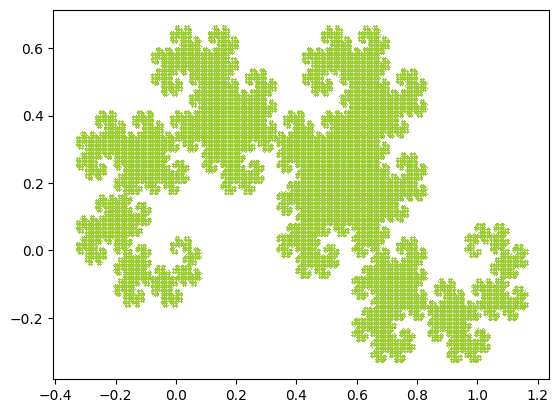

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

_z = S.to("cpu")
sns.scatterplot(x=torch.real(_z), y=torch.imag(_z), ax=ax, color="yellowgreen",
    linewidth=0, s=1)

plt.show()

Ta da! The Heighway Dragon, represented by nearly 30 million dots on a canvas.

## References

[1] Wikipedia. "Dragon curve." Wikipedia.org (accessed Aug. 7, 2023).

[2] Wikipedia. "Iterated function system." Wikipedia.org (accessed Aug. 7, 2023).